<a href="https://colab.research.google.com/github/ienoiaa/ienoia/blob/master/Exer3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Preliminary EDA processes

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sal = pd.read_csv('salary_data.csv')

c. Checking the first 5 rows

In [4]:
print("First 5 rows:\n")
display(sal.head())

First 5 rows:



,Working_Year,Designation,Experience,Employment_Status,Employee_Location,Company_Size,Remote_Working_Ratio,Salary_USD
0,2020.0,Data Scientist,Mid,FT,DE,L,0.0,76227.0
1,2020.0,Machine Learning Scientist,Senior,FT,JP,S,0.0,248257.0
2,2020.0,Big Data Engineer,Senior,FT,GB,M,50.0,104100.0
3,2020.0,Product Data Analyst,Mid,FT,HN,S,0.0,19097.0
4,2020.0,Machine Learning Engineer,Senior,FT,US,L,50.0,143225.0


d. Check the information

In [5]:
print("Information:\n")
display(sal.info())

Information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 610 entries, 0 to 609
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Working_Year          607 non-null    float64
 1   Designation           600 non-null    object 
 2   Experience            592 non-null    object 
 3   Employment_Status     579 non-null    object 
 4   Employee_Location     567 non-null    object 
 5   Company_Size          602 non-null    object 
 6   Remote_Working_Ratio  603 non-null    float64
 7   Salary_USD            598 non-null    float64
dtypes: float64(3), object(5)
memory usage: 38.3+ KB


None

e. Count the value of the categorical data

In [7]:
print("Value counts:\n")
print(sal.value_counts())

Value counts:

Working_Year  Designation     Experience  Employment_Status  Employee_Location  Company_Size  Remote_Working_Ratio  Salary_USD
2022.0        Data Scientist  Senior      FT                 US                 M             100.0                 133677.0      6
              Data Analyst    Senior      FT                 US                 M             100.0                 86241.0       5
                                                                                                                    107801.0      4
              Data Scientist  Senior      FT                 US                 M             100.0                 200515.0      4
              Data Engineer   Senior      FT                 US                 M             100.0                 157930.0      2
                                                                                                                                 ..
2021.0        Data Scientist  Mid         FT                 IN   

f. Describe the data

In [8]:
print("Describe:\n")
display(sal.describe())

Describe:



,Working_Year,Remote_Working_Ratio,Salary_USD
count,607.000000,603.000000,598.000000
mean,2021.405272,70.729685,114379.140468
std,0.692133,40.774865,98496.025306
min,2020.000000,0.000000,300.000000
25%,2021.000000,50.000000,60074.000000
50%,2022.000000,100.000000,98271.000000
75%,2022.000000,100.000000,143225.000000
max,2022.000000,100.000000,800000.000000


2. Visualize the salary by experience level.

Salary by experience level:



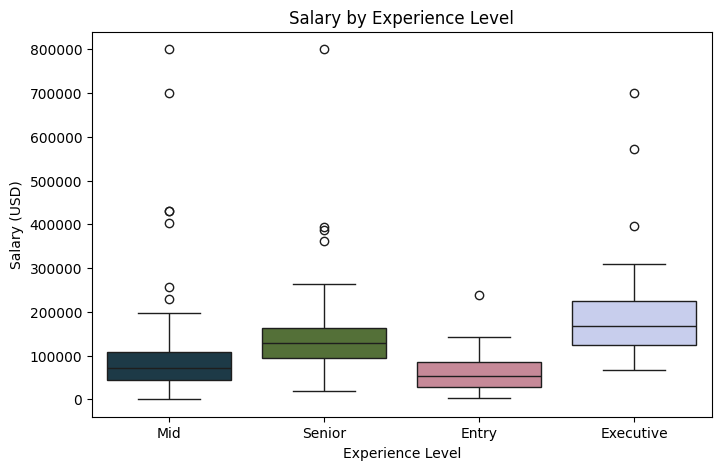

In [31]:
print("Salary by experience level:\n")
plt.figure(figsize=(8,5))
sns.boxplot(x="Experience", y="Salary_USD", hue="Experience", data=sal, palette="cubehelix", legend=False)
plt.title("Salary by Experience Level")
plt.xlabel("Experience Level")
plt.ylabel("Salary (USD)")
plt.show()



3. Visualize the data using sub-group.

Salary by company size and experience level:



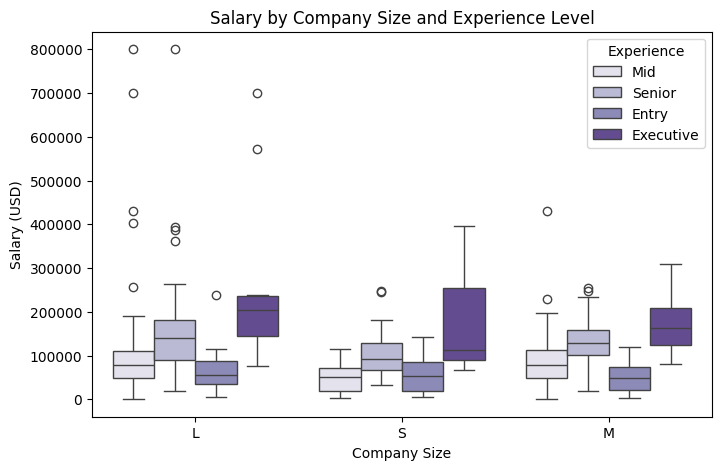

In [28]:
print("Salary by company size and experience level:\n")
plt.figure(figsize=(8,5))
sns.boxplot(x="Company_Size", y="Salary_USD", hue="Experience", data=sal, palette="Purples")
plt.title("Salary by Company Size and Experience Level")
plt.ylabel("Salary (USD)")
plt.xlabel("Company Size")
plt.show()

4. Count the missing values.

In [19]:
print("Missing values:\n")
sal.isnull().sum()

Missing values:



,0
Working_Year,3
Designation,10
Experience,18
Employment_Status,31
Employee_Location,43
Company_Size,8
Remote_Working_Ratio,7
Salary_USD,12


5. Drop the missing values.

In [35]:
print("Drop missing values:\n")
threshold = len(sal) * 0.05
print(threshold)

Drop missing values:

28.35


In [36]:
cols_to_drop = sal.columns[sal.isna().sum()<= threshold]
print(cols_to_drop)

Index(['Working_Year', 'Designation', 'Experience', 'Employment_Status',
       'Company_Size', 'Remote_Working_Ratio', 'Salary_USD'],
      dtype='object')


In [39]:
sal.dropna(subset=cols_to_drop, inplace=True)

6. Impute using the summary statistics.

In [32]:
print("Impute using the summary statistics:\n")
cols_missing_values = sal.columns[sal.isna().sum() > 0]
print(cols_missing_values)

Impute using the summary statistics:

Index(['Employment_Status', 'Employee_Location'], dtype='object')


In [40]:
for col in cols_missing_values[:-1]:
  sal[col].fillna(sal[col].mode()[0])

In [41]:
print(sal.isna().sum())

Working_Year             0
Designation              0
Experience               0
Employment_Status        0
Employee_Location       34
Company_Size             0
Remote_Working_Ratio     0
Salary_USD               0
dtype: int64


7. Impute by sub-group.

In [23]:
sal_dict = sal.groupby("Experience")["Salary_USD"].median().to_dict()
print(sal_dict)

sal["Salary_USD"] = sal["Salary_USD"].fillna(sal["Experience"].map(sal_dict))



{'Entry': 53948.0, 'Executive': 167096.0, 'Mid': 72352.0, 'Senior': 129857.0}
